In [1]:
from google.colab import drive
import pandas as pd
import numpy as np

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/train-perceptron.txt", delimiter = ' ',header = None)
# store dataframe into csv file
df.to_csv('train-perceptron.csv', index = None)

In [4]:
df

,0,1,2
0,1,1.0,1
1,1,-1.0,1
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2
5,4,5.0,1


In [5]:
x11 = []
x12 = []
x21 = []
x22 = []
for i in range(0,6):
  item = df.iloc[i,2]
  if item == 1:
    x11.append(df.iloc[i,0])
    x12.append(df.iloc[i,1])
  if item ==2:
    x21.append(df.iloc[i,0])
    x22.append(df.iloc[i,1])

In [6]:
x22

[2.5, 2.0, 3.0]

Answer no 1 : After plotting the given points as class 1 and class 2, we see that the points are linearly inseparable.

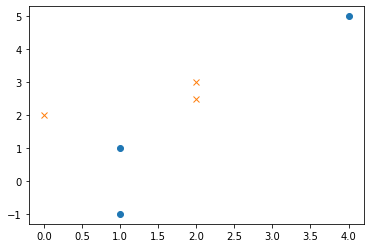

In [7]:
import matplotlib.pyplot as plt

plt.plot(x11, x12, 'o')
plt.plot(x21, x22, 'x')
plt.show()

Answer no 2: High dimensional points are being generated and stored in y1 and y2

In [8]:
y1 = np.arange(18).reshape(3,6)
y2 = np.arange(18).reshape(3,6)
y1 = y1.astype('float64')
y2 = y2.astype('float64')
for i in range(0, 3):
  y1[i,0] = x11[i]*x11[i]
  y1[i,1] = x12[i]*x12[i]
  y1[i,2] = x11[i]*x12[i]
  y1[i,3] = x11[i]
  y1[i,4] = x12[i]
  y1[i,5] = 1
  y2[i,0] = x21[i]*x21[i]
  y2[i,1] = x22[i]*x22[i]
  y2[i,2] = x21[i]*x22[i]
  y2[i,3] = x21[i]
  y2[i,4] = x22[i]
  y2[i,5] = 1

In [9]:
y1

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., -1.,  1., -1.,  1.],
       [16., 25., 20.,  4.,  5.,  1.]])

In [10]:
y2

array([[4.  , 6.25, 5.  , 2.  , 2.5 , 1.  ],
       [0.  , 4.  , 0.  , 0.  , 2.  , 1.  ],
       [4.  , 9.  , 6.  , 2.  , 3.  , 1.  ]])

In [11]:
for i in range(0, 3):
  y2[i,0] = -y2[i,0]
  y2[i,1] = -y2[i,1]
  y2[i,2] = -y2[i,2]
  y2[i,3] = -y2[i,3]
  y2[i,4] = -y2[i,4]
  y2[i,5] = -1

In [12]:
y2

array([[-4.  , -6.25, -5.  , -2.  , -2.5 , -1.  ],
       [-0.  , -4.  , -0.  , -0.  , -2.  , -1.  ],
       [-4.  , -9.  , -6.  , -2.  , -3.  , -1.  ]])

In [13]:
y = np.arange(36).reshape(6,6)
y = y.astype('float64')
y = np.concatenate((y1, y2), axis=0)

In [14]:
y

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  ],
       [16.  , 25.  , 20.  ,  4.  ,  5.  ,  1.  ],
       [-4.  , -6.25, -5.  , -2.  , -2.5 , -1.  ],
       [-0.  , -4.  , -0.  , -0.  , -2.  , -1.  ],
       [-4.  , -9.  , -6.  , -2.  , -3.  , -1.  ]])

In [17]:
def updateWeight(w0, y_miss,alpha):
  return w0+y_miss*alpha;

Answer no 3: Perceptron algorithm for one at a time and many at a time

In [18]:
def oneAtATime(w0,alpha):
  cnt = 0
  while(1):
    j = 0
    misclassified = []
    for i in range(0,6):
      result = np.dot(y[i], w0)
      if result>0:
        continue
      else:
        j = j + 1
        w00 = updateWeight(np.transpose(w0),y[i],alpha)
        w0 = np.transpose(w00)
    cnt = cnt + 1 
    if j==0:
      return cnt

def manyAtATime(w0,alpha):
  cnt = 0
  while(1):
    j = 0
    misclassified = []
    for i in range(0,6):
      result = np.dot(y[i], w0)
      if result>0:
        continue
      else:
        misclassified.append(y[i])
        j = j + 1
    cnt = cnt + 1 
    if j==0:
      return cnt
    else:
      sum =  np.sum(misclassified, axis = 0)
      w00 = updateWeight(np.transpose(w0),sum,alpha)
      w0 = np.transpose(w00)

In [19]:
allZeroMany = []
allZeroOne = []
w0 = np.zeros((6,1))
for i in range(0,10):
  alpha = (i+1)/10
  x = manyAtATime(w0,alpha)
  z = oneAtATime(w0,alpha)
  allZeroMany.append(x)
  allZeroOne.append(z)

In [20]:
allZeroOne

[94, 94, 94, 94, 94, 94, 94, 94, 94, 94]

In [21]:
allOneMany = []
allOneOne = []
w0 = np.ones((6,1))
for i in range(0,10):
  alpha = (i+1)/10
  x = manyAtATime(w0,alpha)
  z = oneAtATime(w0,alpha)
  allOneMany.append(x)
  allOneOne.append(z)

In [22]:
allOneOne

[6, 92, 104, 106, 93, 93, 108, 115, 94, 94]

In [23]:
import random
np.random.seed(48)
randMany = []
randOne = []
w0 = np.random.rand(6,1)
for i in range(0,10):
  alpha = (i+1)/10
  x = manyAtATime(w0,alpha)
  z = oneAtATime(w0,alpha)
  randMany.append(x)
  randOne.append(z)

In [24]:
randOne

[99, 113, 110, 95, 94, 97, 98, 111, 109, 105]

Answer no 4a : We need to take the sample points to a high dimension so that they can be seperated by a linear decision boundary.

Answer no 4b : For the three initial weight cases and for each learning rate, number of updates that is the iteration numbers for both the algorithm is given in the below tables along with their comparative bar charts.

Initial weight vector all Zero


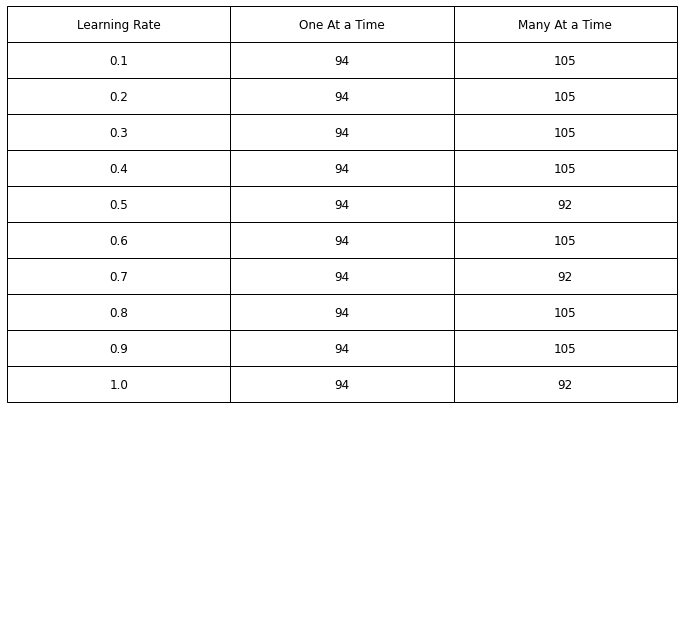

In [25]:
import matplotlib.pyplot as plt
print("Initial weight vector all Zero")
columnheaders=['Learning Rate', 'One At a Time', 'Many At a Time']
lr = []
for i in range(0,10):
  temp = (i+1)/10
  lr.append(temp)
l = [lr,allZeroOne,allZeroMany]
l = list(map(list, zip(*l)))
the_table=plt.table(cellText=l,loc='top', colLabels = columnheaders, cellLoc='center')
plt.axis("off")
the_table.set_fontsize(12)
the_table.scale(2, 3)
plt.show()


Initial weight vector all One


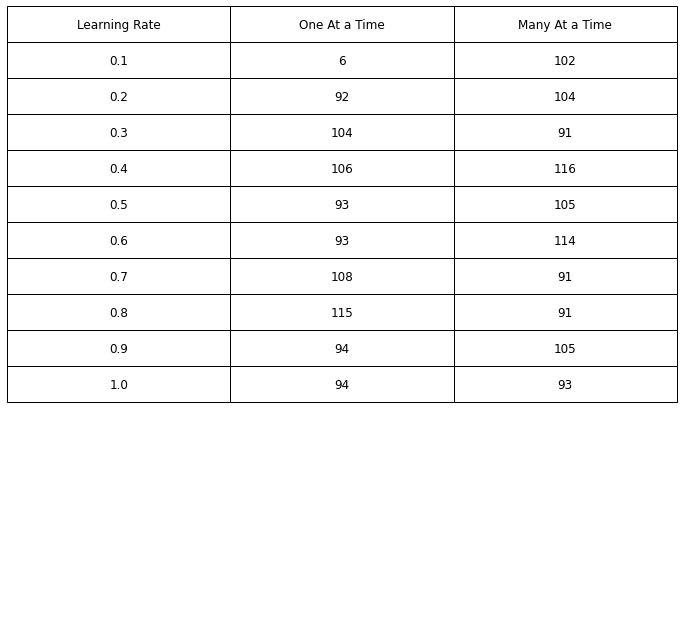

In [26]:
import matplotlib.pyplot as plt
print("Initial weight vector all One")
columnheaders=['Learning Rate', 'One At a Time', 'Many At a Time']
lr = []
for i in range(0,10):
  temp = (i+1)/10
  lr.append(temp)
l = [lr,allOneOne,allOneMany]
l = list(map(list, zip(*l)))
the_table=plt.table(cellText=l,loc='top', colLabels = columnheaders, cellLoc='center')
plt.axis("off")
the_table.set_fontsize(12)
the_table.scale(2, 3)
plt.show()

Initial weight vector Random


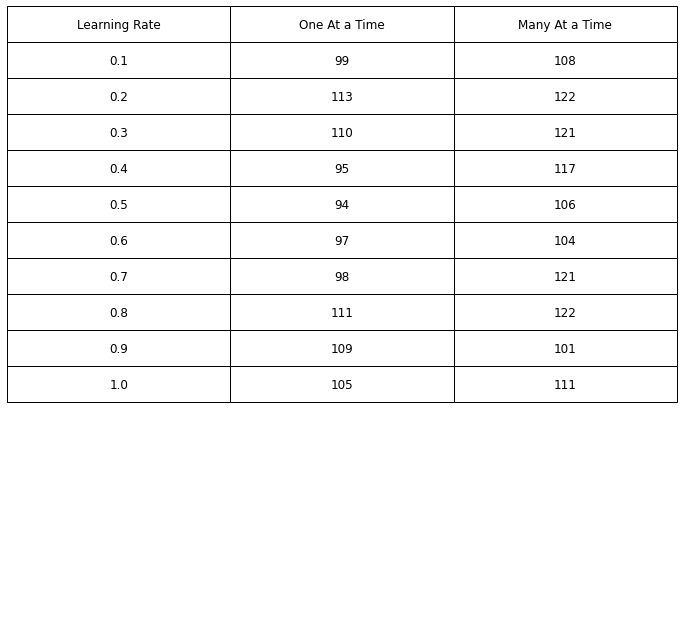

In [27]:
import matplotlib.pyplot as plt
print("Initial weight vector Random")
columnheaders=['Learning Rate', 'One At a Time', 'Many At a Time']
lr = []
for i in range(0,10):
  temp = (i+1)/10
  lr.append(temp)
l = [lr,randOne,randMany]
l = list(map(list, zip(*l)))
the_table=plt.table(cellText=l,loc='top', colLabels = columnheaders, cellLoc='center')
plt.axis("off")
the_table.set_fontsize(12)
the_table.scale(2, 3)
plt.show()

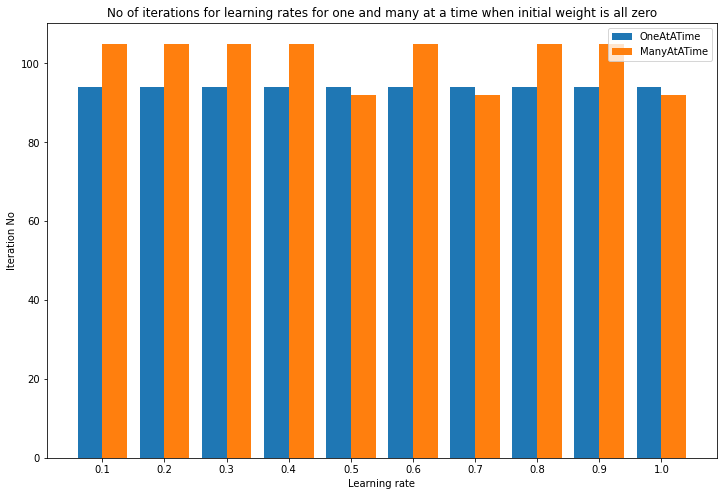

In [28]:
plt.figure(figsize = (12, 8))
X = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, allZeroOne, 0.4, label = 'OneAtATime')
plt.bar(X_axis + 0.2, allZeroMany, 0.4, label = 'ManyAtATime')

plt.xticks(X_axis, X)
plt.xlabel("Learning rate")
plt.ylabel("Iteration No")
plt.title("No of iterations for learning rates for one and many at a time when initial weight is all zero")
plt.yticks([i for i in range(0, 120, 20)])
plt.legend()
plt.show()

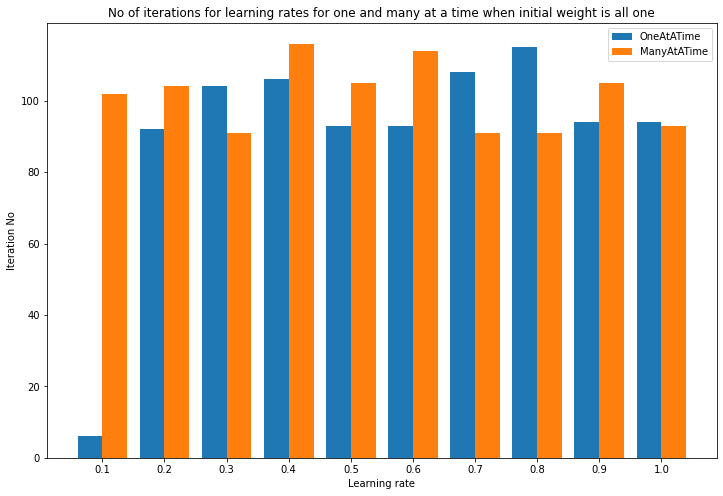

In [29]:
plt.figure(figsize = (12, 8))
X = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, allOneOne, 0.4, label = 'OneAtATime')
plt.bar(X_axis + 0.2, allOneMany, 0.4, label = 'ManyAtATime')
  
plt.xticks(X_axis, X)
plt.xlabel("Learning rate")
plt.ylabel("Iteration No")
plt.title("No of iterations for learning rates for one and many at a time when initial weight is all one")
plt.yticks([i for i in range(0, 120, 20)])
plt.legend()
plt.show()

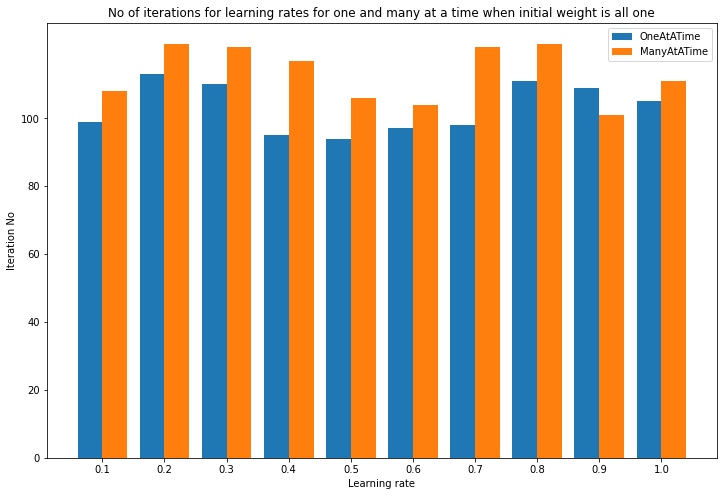

In [30]:
plt.figure(figsize = (12, 8))
X = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, randOne, 0.4, label = 'OneAtATime')
plt.bar(X_axis + 0.2, randMany, 0.4, label = 'ManyAtATime')
  
plt.xticks(X_axis, X)
plt.xlabel("Learning rate")
plt.ylabel("Iteration No")
plt.title("No of iterations for learning rates for one and many at a time when initial weight is all one")
plt.yticks([i for i in range(0, 120, 20)])
plt.legend()
plt.show()